In [19]:
import streamlit as st
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from babyname_utils import load_data, get_top_names, top_names_history
from babyname_utils import display_altair_chart_with_label, display_altair_chart_with_highlight, display_plotly_chart

In [58]:
def get_df_for_bump_chart(top_x_names, last_x_years, gender_select):
    df = load_data()

    # Filter gender
    df = df[df['gender']==gender_select]

    # Get last X years
    latest_year = df['year'].max()
    df = df[df['year']>latest_year-last_x_years]
    # Get top X names
    df = df[df['rank']<=top_x_names]
    return df

In [53]:
def create_bump_chart_dict(df):
    list_of_dicts = []
    for name in df['name'].unique():
        tmp_df = df[df['name']==name]
        data_dict = {
            'name':list(tmp_df['name']),
            'year':list(tmp_df['year']),
            'rank':list(tmp_df['rank'])
        }
        list_of_dicts.append(data_dict)
    return list_of_dicts

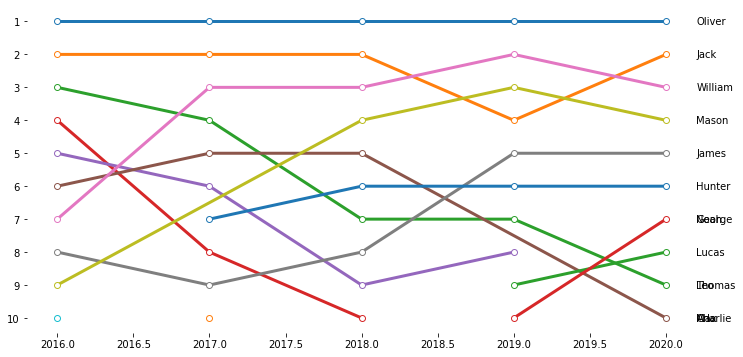

In [64]:
top_x_names = 10
gender_select = 'male'
last_x_years = 5

df = get_df_for_bump_chart(top_x_names, last_x_years, gender_select)
data_dicts = create_bump_chart_dict(df)

# Creat figure and subplots
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,6)

# Calling the plot method for each name
for element in data_dicts:
    ax.plot(element["year"], 
        element["rank"], 
        "o-", # format of marker / format of line
        markerfacecolor="white",
        linewidth=3)

    # Labelling the lines
    ax.annotate(element["name"][0], 
                xy=(2020, element["rank"][0]), 
                xytext=(2020.2,element["rank"][0]), 
                va="center")

# Inverting the y-axis and setting axis ticks
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, top_x_names+1, 1))

# Clearing the plot
for spine in ax.spines.values():
    spine.set_visible(False)

In [30]:
df = load_data()

# def display_altar_bump_chart(df):

df = filter_df_bump_chart(df)

alt.Chart(df).mark_line(point=True).encode(
    x=alt.X("year:T"),  #.timeUnit("year").title("year"),
    y="rank:O",
    color=alt.Color("name:N")
).transform_window(
    rank="rank()",
    sort=[alt.SortField("count", order="descending")],
    groupby=["year"]
).properties(
    title="Bump Chart for Stock Prices",
    width=600,
    height=150,
)

alt.Chart(...)